# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
import sqlalchemy
import sql_utilities as sqlutil
import support_functions as sf
from typing import *
import warnings
warnings.filterwarnings("ignore")

##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:2194: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:
regions =[
    "argentina",
    #"bahamas",
    #"barbados" - missing in latest?,
    #"belize",
    #"bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    #"dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    #"suriname",
    #"trinidad_and_tobago",
    "uruguay",
    #"venezuela"
]


In [20]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    regions = ["brazil", "mexico"]#["brazil", "chile", "ecuador", "mexico"]
)

#id_str = "sisepuede_run_2023-02-28T20:47:55.917752",

2023-03-07 20:20:57,787 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-03-07 20:20:57,789 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-03-07 20:20:57,789 - INFO - 	Setting export engine to 'sqlite'.
2023-03-07 20:20:57,792 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-03-07 20:20:57,793 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-03-07 20:20:57,796 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2023-03-07 20:20:57,796 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2023-03-07 20:20:57,798 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2023-03-07 20:20:57,799 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2023-03-07 20:20:57,800 - WARNING - No index

## Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [23]:
strats_run = [0]
strats_run += list(range(3001, 3012))
strats_run += list(range(3024, 3039))



strats_drop = [3001, 3002, 3003, 3005, 3006, 3008, 3011, 3025, 3028, 3033, 3035, 3036, 3037]
strats_drop += [3030, 3032]

strats_run = [x for x in strats_run if x not in strats_drop]

In [ ]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
strats_run = [0]
strats_run += list(range(3001, 3012))
strats_run += list(range(3024, 3039))




strats_drop = [3001, 3002, 3003, 3005, 3006, 3008, 3011, 3025, 3028, 3033, 3035, 3036, 3037]
strats_drop += [3030, 3032]
strats_run = [x for x in strats_run if x not in strats_drop]


dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": strats_run#[0, 3008, 3009, 3031]# strats_run#[0, 3025, 3026, 3027]
}
# dict_filt = {
#     "future_id": [1],
#     "design_id": [0], 
#     "strategy_id": [0, 3001]
# }
dict_primary_keys_out = sisepuede.project_scenarios(
    dict_filt,
    chunk_size = 2
)

2023-03-07 20:33:19,736 - INFO - 
***	STARTING REGION brazil	***

2023-03-07 20:33:20,249 - INFO - Trying run primary_id = 0 in region brazil
2023-03-07 20:33:20,251 - INFO - Running AFOLU model
2023-03-07 20:33:20,653 - INFO - AFOLU model run successfully completed
2023-03-07 20:33:20,654 - INFO - Running CircularEconomy model
2023-03-07 20:33:20,792 - INFO - CircularEconomy model run successfully completed
2023-03-07 20:33:20,793 - INFO - Running IPPU model
2023-03-07 20:33:20,926 - INFO - IPPU model run successfully completed
2023-03-07 20:33:20,927 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-03-07 20:33:20,981 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-03-07 20:33:21,241 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-03-07 20:33:21,242 - INFO - Running Energy model (Electricity: trying to call Julia)
2023-0

2023-07-Mar 20:33:21.307 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-07-Mar 20:33:21.338 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-07-Mar 20:33:23.810 Started modeling scenario.
2023-07-Mar 20:34:10.610 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-03-07 20:34:11,075 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-03-07 20:34:11,103 - INFO - ElectricEnergy model run successfully completed
2023-03-07 20:34:11,218 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-03-07 20:34:11,222 - INFO - Model run for primary_id = 0 successfully completed in 50.97 seconds.
2023-03-07 20:34:11,232 - INFO - Trying run primary_id = 8008 in region brazil
2023-03-07 20:34:11,233 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-03-07 20:34:11,632 - INFO - AFOLU model run successfully completed
2023-03-07 20:34:11,633 - INFO - Running CircularEconomy model
2023-03-07 20:34:11,774 - INFO - CircularEconomy model run successfully completed
2023-03-07 20:34:11,775 - INFO - Running IPPU model
2023-03-07 20:34:11,912 - INFO - IPPU model run successfully completed
2023-03-07 20:34:11,913 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-03-07 20:34:11,963 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-03-07 20:34:12,208 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-03-07 20:34:12,208 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-07-Mar 20:34:14.784 Started modeling scenario.
2023-07-Mar 20:35:01.886 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-03-07 20:35:02,335 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-03-07 20:35:02,364 - INFO - ElectricEnergy model run successfully completed
2023-03-07 20:35:02,475 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-03-07 20:35:02,479 - INFO - Model run for primary_id = 8008 successfully completed in 51.25 seconds.



	Running Energy (Fugitive Emissions)


2023-03-07 20:35:03,202 - INFO - Table MODEL_OUTPUT successfully written to database.
2023-03-07 20:35:03,208 - INFO - Trying run primary_id = 11011 in region brazil
2023-03-07 20:35:03,209 - INFO - Running AFOLU model
2023-03-07 20:35:03,601 - INFO - AFOLU model run successfully completed
2023-03-07 20:35:03,602 - INFO - Running CircularEconomy model
2023-03-07 20:35:03,729 - INFO - CircularEconomy model run successfully completed
2023-03-07 20:35:03,729 - INFO - Running IPPU model
2023-03-07 20:35:03,861 - INFO - IPPU model run successfully completed
2023-03-07 20:35:03,862 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-03-07 20:35:03,910 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-03-07 20:35:04,161 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-03-07 20:35:04,162 - INFO - Running Energy model (Electricity: tryi

Set parameter TimeLimit to value 900


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-07-Mar 20:35:07.073 Started modeling scenario.
2023-07-Mar 20:35:54.007 Finished modeling scenario.


2023-03-07 20:35:54,477 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-03-07 20:35:54,504 - INFO - ElectricEnergy model run successfully completed
2023-03-07 20:35:54,613 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-03-07 20:35:54,618 - INFO - Model run for primary_id = 11011 successfully completed in 51.41 seconds.
2023-03-07 20:35:54,624 - INFO - Trying run primary_id = 13013 in region brazil
2023-03-07 20:35:54,624 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-03-07 20:35:55,029 - INFO - AFOLU model run successfully completed
2023-03-07 20:35:55,030 - INFO - Running CircularEconomy model
2023-03-07 20:35:55,156 - INFO - CircularEconomy model run successfully completed
2023-03-07 20:35:55,157 - INFO - Running IPPU model
2023-03-07 20:35:55,284 - INFO - IPPU model run successfully completed
2023-03-07 20:35:55,285 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-03-07 20:35:55,331 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-03-07 20:35:55,577 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-03-07 20:35:55,577 - INFO - Running Energy model (Electricity: trying to call Julia)


Set parameter TimeLimit to value 900
2023-07-Mar 20:35:57.963 Started modeling scenario.

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107



2023-07-Mar 20:36:46.972 Finished modeling scenario.


2023-03-07 20:36:47,436 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-03-07 20:36:47,463 - INFO - ElectricEnergy model run successfully completed
2023-03-07 20:36:47,572 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-03-07 20:36:47,575 - INFO - Model run for primary_id = 13013 successfully completed in 52.95 seconds.



	Running Energy (Fugitive Emissions)


2023-03-07 20:36:48,136 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-03-07 20:36:48,141 - INFO - Trying run primary_id = 14014 in region brazil
2023-03-07 20:36:48,142 - INFO - Running AFOLU model
2023-03-07 20:36:48,553 - INFO - AFOLU model run successfully completed
2023-03-07 20:36:48,553 - INFO - Running CircularEconomy model
2023-03-07 20:36:48,681 - INFO - CircularEconomy model run successfully completed
2023-03-07 20:36:48,681 - INFO - Running IPPU model
2023-03-07 20:36:48,809 - INFO - IPPU model run successfully completed
2023-03-07 20:36:48,810 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-03-07 20:36:48,859 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-03-07 20:36:49,113 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-03-07 20:36:49,114 - INFO - Running Energy model (Electricity: try

In [14]:
#sisepuede.attribute_strategy.table
import inspect
import sqlalchemy
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}")
 

region = "brazil"
df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(None, None, 0, True)

if True:
    df_in.to_csv(
        os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
        encoding = "UTF-8",
        index = None
    )

In [18]:
df_out_all = sisepuede.read_output(None)
region = "mexico"
df_out = df_out_all[df_out_all["region"] == region]
df_primary = sisepuede.odpt_primary.get_indexing_dataframe(dict_filt)
df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(None, None, 0, True)

attr_strat = sisepuede.model_attributes.dict_attributes.get("dim_strategy_id")


In [12]:
df_in_filt_intervention[
    [x for x in df_in_filt_intervention.columns if "min_share_production" in x]
]


,nemomod_entc_frac_min_share_production_fp_hydrogen_electrolysis,nemomod_entc_frac_min_share_production_fp_hydrogen_gasification,nemomod_entc_frac_min_share_production_fp_hydrogen_reformation,nemomod_entc_frac_min_share_production_pp_biogas,nemomod_entc_frac_min_share_production_pp_biomass,nemomod_entc_frac_min_share_production_pp_coal,nemomod_entc_frac_min_share_production_pp_coal_ccs,nemomod_entc_frac_min_share_production_pp_gas,nemomod_entc_frac_min_share_production_pp_gas_ccs,nemomod_entc_frac_min_share_production_pp_geothermal,nemomod_entc_frac_min_share_production_pp_hydropower,nemomod_entc_frac_min_share_production_pp_nuclear,nemomod_entc_frac_min_share_production_pp_ocean,nemomod_entc_frac_min_share_production_pp_oil,nemomod_entc_frac_min_share_production_pp_solar,nemomod_entc_frac_min_share_production_pp_waste_incineration,nemomod_entc_frac_min_share_production_pp_wind
1260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.000,0.0,0.000
1261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.000,0.0,0.000
1262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.000,0.0,0.000
1263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.000,0.0,0.000
1264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.000,0.0,0.000
1265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.000,0.0,0.000
1266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.103218,0.0,0.0,0.0,0.000,0.0,0.000
1267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.108093,0.0,0.0,0.0,0.000,0.0,0.000
1268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.105186,0.0,0.0,0.0,0.000,0.0,0.000
1269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.105186,0.0,0.0,0.0,0.000,0.0,0.000


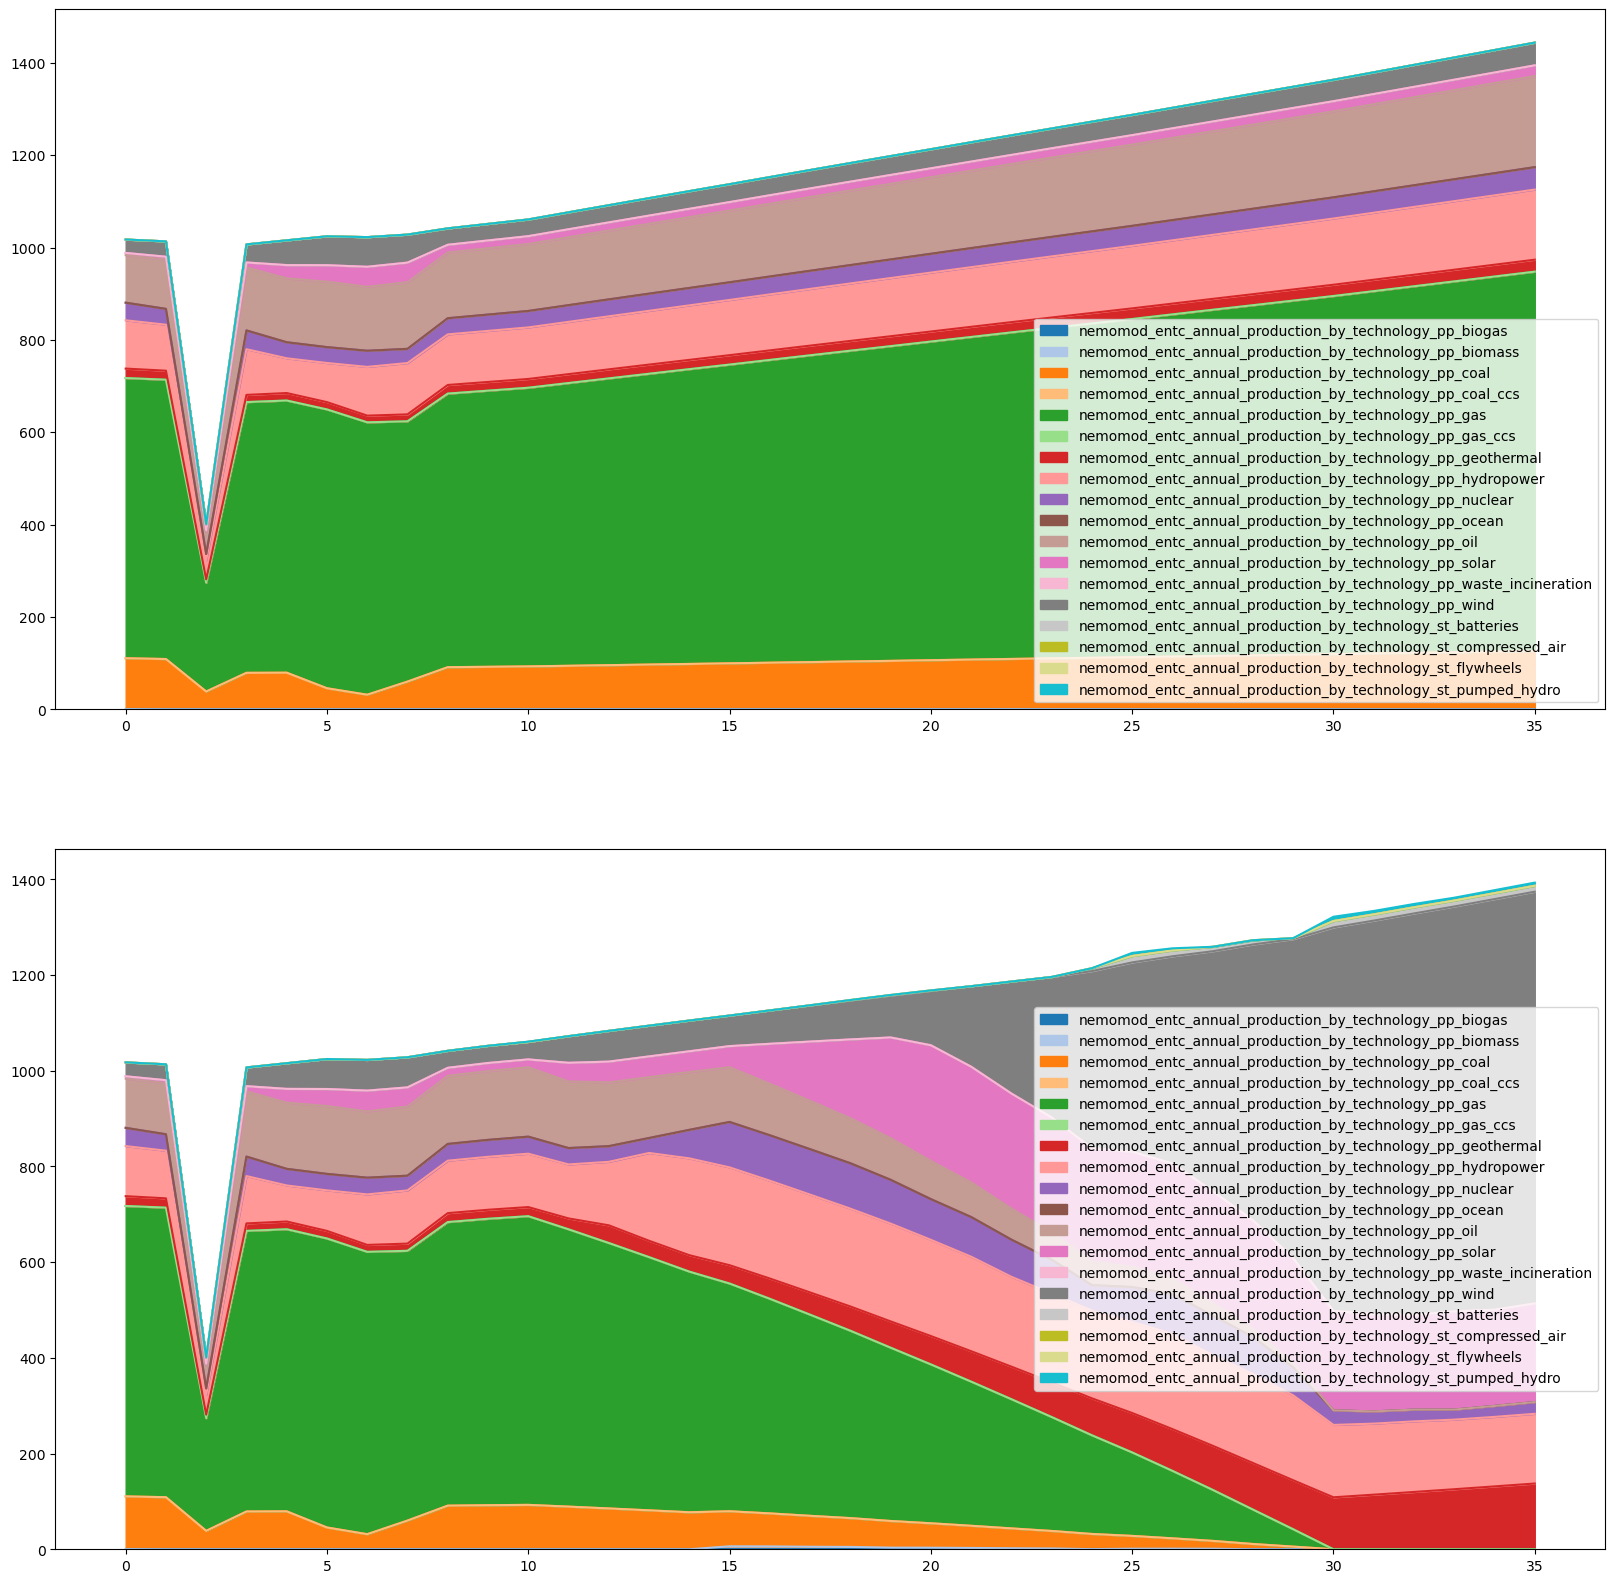

In [19]:
# 3008, 3009, 3031
strat_id, strat_id_intervention = 0, 3031
# baseline
dict_filt2 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id]
    dict_filt2.update({k: val[0]})
primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)
df_filt = df_out[
    df_out[sisepuede.key_primary].isin([primary_id])
]

# intervention
dict_filt_invervention = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id_intervention]
    dict_filt_invervention.update({k: val[0]})
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt_invervention)
df_filt_intervention = df_out[
    df_out[sisepuede.key_primary].isin([primary_id_intervention])
]


df_in_filt = df_in[
    df_in[sisepuede.key_strategy].isin([strat_id])
]

df_in_filt_intervention = df_in[
    df_in[sisepuede.key_strategy].isin([strat_id_intervention])
]


fig, ax = plt.subplots(2, 1, figsize = (20, 20))
palette_func = plt.cm.tab20#plt.cm.hsv

flds = [
    x for x in df_filt.columns 
    if x.startswith("emission_co2e_subsector_total") 
    and (
        ("ccsq" in x) 
        or ("entc" in x)
        or ("enfu" in x)
        or ("fgtv" in x)
        or ("inen" in x)
        or ("scoe" in x)
        or ("trns" in x)
    )
]

flds = [x for x in df_filt.columns if x.startswith("energy_demand_enfu_total")]

if True:
    
    modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_emissions_co2_mne
    modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #modvar_plot = model_elec.modvar_entc_nemomod_production_by_technology
    #modvar_plot = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
    df = sisepuede.model_attributes.get_standard_variables(
        df_filt,
        modvar_plot
    )
    #df = df_filt[flds]
    if len(df) > 0:
        for k in df.columns:
            df[k] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    df.plot.area(ax = ax[0], color = colors)
    
    
    df = sisepuede.model_attributes.get_standard_variables(
        df_filt_intervention,
        modvar_plot
    )
    #df = df_filt_intervention[flds]
    for k in df.columns:
        df[k] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    df.plot.area(ax = ax[1], color = colors)
    

if False:
    df = sisepuede.model_attributes.get_standard_variables(
        df_filt_intervention,
        sisepuede.models.model_energy.modvar_ccsq_emissions_co2#modvar_ccsq_emissions_co2
        #modvar_inen_emissions_co2
        #model_elec.modvar_entc_nemomod_production_by_technology
        #model_energy.modvar_fgtv_emissions_ch4
    )
    for k in df.columns:
        df[k] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    df.plot.area(ax = ax, color = colors)
        
        
        
        
if False:
    sisepuede.model_attributes.get_standard_variables(
        df_in_filt,
        sisepuede.models.model_electricity.modvar_entc_nemomod_residual_capacity
    ).plot.area(ax = ax)



In [15]:
fp_sqlite_intermediate = sisepuede.file_struct.fp_sqlite_tmp_nemomod_intermediate
engine = sqlalchemy.create_engine(f"sqlite:///{fp_sqlite_intermediate}")


In [19]:
df = sqlutil.sql_table_to_df(engine, "vdiscountedcapitalinvestment")

df[df["y"] == "1000"]

,r,t,y,val,solvedtm
0,mexico,pp_coal,1000,5.141651e+03,2023-03-07 17:33:07.549
1,mexico,pp_gas,1000,2.500525e+04,2023-03-07 17:33:07.549
2,mexico,pp_nuclear,1000,8.171675e+03,2023-03-07 17:33:07.549
3,mexico,pp_wind,1000,4.459853e+03,2023-03-07 17:33:07.549
4,mexico,supply_fuel_coal,1000,1.853715e+06,2023-03-07 17:33:07.549
5,mexico,supply_fuel_diesel,1000,5.060592e+06,2023-03-07 17:33:07.549
6,mexico,supply_fuel_electricity,1000,1.231551e+05,2023-03-07 17:33:07.549
7,mexico,supply_fuel_gasoline,1000,1.046768e+07,2023-03-07 17:33:07.549
8,mexico,supply_fuel_hydrocarbon_gas_liquids,1000,7.175443e+05,2023-03-07 17:33:07.549
9,mexico,supply_fuel_hydrogen,1000,7.209993e+01,2023-03-07 17:33:07.549


In [92]:
df_filt_m = df_melt[
    df_melt[sisepuede.key_primary].isin([primary_id]) & 
    df_melt["region"].isin(["brazil"])
]
df_filt_intervention_m = df_melt[
    df_melt[sisepuede.key_primary].isin([primary_id_intervention]) & 
    df_melt["region"].isin(["brazil"])
]

In [103]:
s_o = [
    x for x in df_filt_intervention.columns 
    if "emission_co2e_" in x 
    and ("subsector_total" not in x) 
    and (
        ("_entc_" in x) 
        or ("_inen_" in x)
        or ("_scoe_" in x)
        or ("_ccsq_" in x)
        or ("_trns_" in x)
        or ("_enfu_" in x)
        or ("_fgtv_" in x)
    )
]
s_m = [x for x in df_filt_intervention_m.columns if "emission_co2e_" in x and ("subsector_total" not in x)]


False

In [29]:
x = np.random.random((5, 6))
np.max(x, axis = 0)



array([0.92308959, 0.69547561, 0.95503447, 0.97334748, 0.96844925,
       0.9729409 ])

In [152]:
df_filt_intervention_m[s_o].sum(axis = 1).tail()

607    954.671911
608    956.344713
609    958.094852
610    959.941531
611    961.901286
dtype: float64

In [ ]:
###### df_out[df_out["primary_id"] == 0][[x for x in df_out.columns if ("energy_demand_enfu_total_fuel" in x) and ("demand" in x)]].iloc[0]


strat_id, strat_id_intervention = 0, 3001

# baseline
dict_filt2 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id]
    dict_filt2.update({k: val[0]})
primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)

df_filt = df_out[
    df_out[sisepuede.key_primary].isin([primary_id])
]


# intervention
dict_filt3 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id_intervention]
    dict_filt3.update({k: val[0]})
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt3)

df_filt_int = df_out[
    df_out[sisepuede.key_primary].isin([primary_id_intervention])
]

#modvar = sisepuede.models.model_electricity.modvar_enfu_energy_demand_by_fuel_total
model_energy = sisepuede.models.model_energy
modvar = model_energy.modvar_enfu_energy_demand_by_fuel_inen#
modvar = "Energy Consumption from Industrial Energy"
modvar = "Energy Consumption from SCOE"
#modvar = model_energy.modvar_inen_emissions_co2
modvar = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4

df_test_0 = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    modvar
);

df_test_int = sisepuede.model_attributes.get_standard_variables(
    df_filt_int,
    modvar
);



In [42]:
df_filt_intervention[
    [x for x in df_filt_intervention.columns if ("subsector_total" in x) and ("ccsq" in x)]
]

,emission_co2e_subsector_total_ccsq,energy_demand_enfu_subsector_total_pj_ccsq_fuel_biofuels,energy_demand_enfu_subsector_total_pj_ccsq_fuel_biogas,energy_demand_enfu_subsector_total_pj_ccsq_fuel_biomass,energy_demand_enfu_subsector_total_pj_ccsq_fuel_coal,energy_demand_enfu_subsector_total_pj_ccsq_fuel_coke,energy_demand_enfu_subsector_total_pj_ccsq_fuel_crude,energy_demand_enfu_subsector_total_pj_ccsq_fuel_diesel,energy_demand_enfu_subsector_total_pj_ccsq_fuel_electricity,energy_demand_enfu_subsector_total_pj_ccsq_fuel_furnace_gas,...,energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydropower,energy_demand_enfu_subsector_total_pj_ccsq_fuel_kerosene,energy_demand_enfu_subsector_total_pj_ccsq_fuel_natural_gas,energy_demand_enfu_subsector_total_pj_ccsq_fuel_nuclear,energy_demand_enfu_subsector_total_pj_ccsq_fuel_ocean,energy_demand_enfu_subsector_total_pj_ccsq_fuel_oil,energy_demand_enfu_subsector_total_pj_ccsq_fuel_other,energy_demand_enfu_subsector_total_pj_ccsq_fuel_solar,energy_demand_enfu_subsector_total_pj_ccsq_fuel_waste,energy_demand_enfu_subsector_total_pj_ccsq_fuel_wind
2736,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2737,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2738,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2739,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2740,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2741,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2742,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2743,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2744,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2745,-0.621790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.600,0.0,...,0.0,0.0,6.27200,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
modvar = sisepuede.models.model_energy.modvar_fgtv_frac_reduction_fugitive_leaks
df = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    #sisepuede.models.model_electricity.modvar_entc_nemomod_discounted_capital_investment
    #sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
)

In [9]:
df_out = sisepuede.read_output(None)
df_in = sisepuede.experimental_manager.dict_future_trajectories.get("brazil").generate_future_from_lhs_vector(None, None, 0, True)



In [35]:

var = sisepuede.models.model_energy.modvar_inen_emissions_ch4
sisepuede.model_attributes.get_standard_variables(
    df_out[df_out["primary_id"] == 0], 
    var
).head()

,emission_co2e_ch4_inen_agriculture_and_livestock,emission_co2e_ch4_inen_cement,emission_co2e_ch4_inen_chemicals,emission_co2e_ch4_inen_electronics,emission_co2e_ch4_inen_glass,emission_co2e_ch4_inen_lime_and_carbonite,emission_co2e_ch4_inen_metals,emission_co2e_ch4_inen_other_product_manufacturing,emission_co2e_ch4_inen_paper,emission_co2e_ch4_inen_plastic,emission_co2e_ch4_inen_recycled_glass,emission_co2e_ch4_inen_recycled_metals,emission_co2e_ch4_inen_recycled_paper,emission_co2e_ch4_inen_recycled_plastic,emission_co2e_ch4_inen_recycled_rubber_and_leather,emission_co2e_ch4_inen_recycled_textiles,emission_co2e_ch4_inen_recycled_wood,emission_co2e_ch4_inen_rubber_and_leather,emission_co2e_ch4_inen_textiles
0,0.000652,0.157110,0.153208,0.000519,0.003897,0.000189,0.052969,0.000461,0.447092,0.002900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000641
1,0.000642,0.153350,0.159578,0.000535,0.003931,0.000169,0.051239,0.000361,0.453517,0.003039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000643
2,0.000642,0.153189,0.159410,0.000535,0.003926,0.000169,0.051184,0.000359,0.453048,0.003035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000642
3,0.000644,0.153027,0.159242,0.000534,0.003920,0.000168,0.051129,0.000358,0.452579,0.003031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000641
4,0.000644,0.152865,0.159073,0.000534,0.003915,0.000168,0.051073,0.000356,0.452108,0.003027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000640


In [34]:

var = sisepuede.models.model_energy.modvar_inen_en_prod_intensity_factor
sisepuede.model_attributes.get_standard_variables(
    df_in[df_in["strategy_id"] == 0], 
    var
).head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,consumpinit_inen_energy_tj_per_tonne_production_chemicals,consumpinit_inen_energy_tj_per_tonne_production_electronics,consumpinit_inen_energy_tj_per_tonne_production_glass,consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite,consumpinit_inen_energy_tj_per_tonne_production_metals,consumpinit_inen_energy_tj_per_tonne_production_paper,consumpinit_inen_energy_tj_per_tonne_production_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_glass,consumpinit_inen_energy_tj_per_tonne_production_recycled_metals,consumpinit_inen_energy_tj_per_tonne_production_recycled_paper,consumpinit_inen_energy_tj_per_tonne_production_recycled_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_recycled_textiles,consumpinit_inen_energy_tj_per_tonne_production_recycled_wood,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_textiles
0,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
1,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
2,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
3,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
4,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008


In [13]:

var = "NemoMod :math:\\text{CO}_2 Emissions from Electricity Generation"
sisepuede.model_attributes.get_standard_variables(
    df_out[df_out["time_period"] > 34], 
    var
)

,emission_co2e_co2_entc_generation_pp_biogas,emission_co2e_co2_entc_generation_pp_biomass,emission_co2e_co2_entc_generation_pp_coal,emission_co2e_co2_entc_generation_pp_gas,emission_co2e_co2_entc_generation_pp_geothermal,emission_co2e_co2_entc_generation_pp_hydropower,emission_co2e_co2_entc_generation_pp_nuclear,emission_co2e_co2_entc_generation_pp_ocean,emission_co2e_co2_entc_generation_pp_oil,emission_co2e_co2_entc_generation_pp_solar,emission_co2e_co2_entc_generation_pp_waste_incineration,emission_co2e_co2_entc_generation_pp_wind
0,0.0,22.522807,0.813540,57.079049,0.0,0.0,0.0,0.0,19.424343,0.0,0.777381,0.0
1,0.0,20.109595,0.746509,70.568198,0.0,0.0,0.0,0.0,19.424343,0.0,0.777381,0.0


In [42]:
import sqlalchemy
import sql_utilities as su
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")
df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [35]:
sisepuede.database.dict_all_tables#read_table(sisepuede.database.table_name_attribute_primary)
idt = sisepuede.database.db.dict_iterative_database_tables.get(sisepuede.database.table_name_attribute_primary)


In [116]:
sisepuede.model_attributes.dict_attributes.keys()

dict_keys(['ts_group_2', 'cat_scoe', 'cat_storage', 'unit_monetary', 'ts_group_1', 'cat_landuse', 'cat_technology', 'cat_soil_management', 'unit_volume', 'cat_waste_solid', 'cat_economy', 'dim_time_period', 'unit_energy', 'cat_agriculture', 'cat_transportation_demand', 'cat_waste_liquid', 'cat_general', 'unit_power', 'emission_gas', 'cat_manure_management', 'dim_strategy_id', 'abbreviation_sector', 'cat_forest', 'cat_wastewater_treatment', 'hour', 'time_slice', 'abbreviation_subsector', 'cat_industry', 'cat_fuel', 'mode', 'dim_design_id', 'cat_ccsq', 'cat_transportation', 'region', 'unit_length', 'unit_area', 'nemomod_table', 'unit_mass', 'cat_livestock'])

In [16]:
vars_extract = sisepuede.model_attributes.build_varlist("Energy Technology", "NemoMod Discounted Capital Investment")
df_out = sisepuede.read_output(None)

sector = "Energy"
subsectors = sisepuede.model_attributes.get_sector_subsectors(sector)
attr_subsec = sisepuede.model_attributes.dict_attributes.get("abbreviation_subsector")
dict_subsector_name_to_abv = attr_subsec.field_maps.get(f"subsector_to_{attr_subsec.key}")

# add in subsector emission totals
vars_extract += [f"emission_co2e_subsector_total_{dict_subsector_name_to_abv.get(x)}" for x in subsectors]

for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur

    
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]
fields_ext = [x for x in vars_extract if x in df_out.columns]
df_melt = df_out[fields_ind + fields_ext];
print("here")

dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None

# write output
pd.melt(
    df_melt,
    fields_ind,
    fields_ext
).to_csv(
    os.path.join(dir_pkg, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}.csv"),
    index = None,
    encoding = "UTF-8"
)



for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


here


In [42]:
df_primary = sisepuede.odpt_primary.get_indexing_dataframe(sorted(list(df_out[sisepuede.key_primary].unique())))
df_primary.to_csv(
    os.path.join(dir_pkg, f"ATTRIBUTE_PRIMARY.csv"),
    index = None,
    encoding = "UTF-8"
)


<AxesSubplot: >

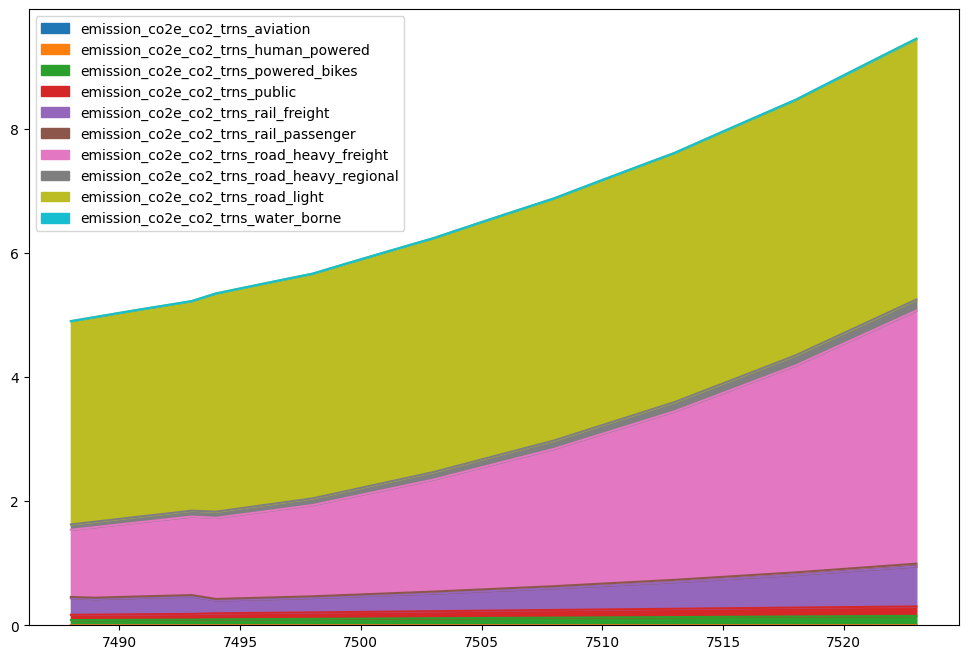

In [6]:
df_plot = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["guatemala"])
][[x for x in df_out.columns if x.startswith("emission_co2e_co2") and ("trns" in x)]]

fig, ax = plt.subplots(figsize = (12, 8))
df_plot.plot.area(ax = ax)

In [8]:
df_try = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["brazil"])
];

In [37]:
subsec = "Industrial Energy"
dict_repl = {
    "Carbon Capture and Sequestration": "CCSQ",
    "Stationary Combustion and Other Energy": "SCOE"
}

for subsec in ["Carbon Capture and Sequestration", "Industrial Energy", "Stationary Combustion and Other Energy", "Transportation"]:
    #sisepuede.model_attributes.get_standard_variables(
    #    df_try,
        #"Energy Demand by Fuel in Industrial Energy"
    #    "Energy Consumption from Transportation"
    #)
    
    snm = dict_repl.get(subsec, subsec)
    
    vl_1 = sisepuede.model_attributes.build_varlist(
        subsec, f"Energy Consumption from {snm}"
    )
    vl_2 = sisepuede.model_attributes.build_varlist(
        "Energy Fuels", f"Energy Demand by Fuel in {snm}"
    )
    
    print(subsec)
    print("-"*len(subsec) + "\n")
    
    str_print = " +\n".join(vl_1) + "\n = \n" + " +\n".join(vl_2) + "\n\n\n"
    
    print(str_print)



Carbon Capture and Sequestration
--------------------------------

energy_consumption_ccsq_direct_air_capture
 = 
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biofuels +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biogas +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biomass +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coke +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_diesel +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_electricity +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_furnace +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_petroleum_liquid +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gasoline +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_geothermal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydrogen +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydropower +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_kerosene +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_nat

In [17]:
df_out[
    (df_out["time_period"] == 35) &
    (df_out["primary_id"] == 0)
][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_inen_fuel_coal"]]




,primary_id,region,energy_demand_enfu_subsector_total_pj_inen_fuel_coal
35,0,argentina,229.046741
971,0,brazil,1260.032978
1907,0,chile,121.707515
2843,0,colombia,355.019806
3779,0,costa_rica,41.374175
4715,0,dominican_republic,83.226304
5651,0,ecuador,61.921287
6587,0,el_salvador,26.714798
7523,0,guatemala,94.181011
8459,0,honduras,38.230958


In [10]:
df_out[df_out["time_period"] == 35][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_trns_fuel_electricity"]]

,primary_id,region,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity
35,0,argentina,2.422414
71,5005,argentina,2.422414
107,6006,argentina,2.422414
143,7007,argentina,2.422414
179,8008,argentina,2.422414
...,...,...,...
15767,25025,uruguay,0.169664
15803,26026,uruguay,0.169664
15839,27027,uruguay,0.169664
15875,28028,uruguay,0.169664


In [11]:
dict_check = sisepuede.experimental_manager.dict_future_trajectories["brazil"].dict_sampling_units
#for k in dict_check.keys():
#    if "frac_trns_fuelmix_public_electricity" in dict_check[k].variable_specifications:
#        print(k)
su = dict_check.get(1223)
su.generate_future(0, 1, baseline_future_q = True)
su.variable_specifications

['frac_trns_fuelmix_public_electricity']

In [82]:
baseline_future_q = True

In [12]:
baseline_future_q = True
strat_base = 0
rv = su.uncertainty_ramp_vector
vs = su.variable_specifications[0]

dict_ordered_traj_arrays = su.ordered_trajectory_arrays.get((vs, None))
dict_scalar_diff_arrays = su.scalar_diff_arrays.get((vs, None))
dict_var_info = su.dict_variable_info.get((vs, None))

# order the uniform scaling by the ordered trajectory arrays
vec_unif_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["uniform_scaling_q"], (vs, None))
# gives 1s where we keep standard fanning (using the ramp vector) and 0s where we use uniform scaling
vec_base = 1 - vec_unif_scalar
#
if max(vec_unif_scalar) > 0:
    vec_max_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["max_scalar"], (vs, None))
    vec_min_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["min_scalar"], (vs, None))
    vec_unif_scalar = vec_unif_scalar*(vec_min_scalar + lhs_trial_x*(vec_max_scalar - vec_min_scalar)) if not baseline_future_q else np.ones(vec_unif_scalar.shape)

vec_unif_scalar = np.array([vec_unif_scalar]).transpose()
vec_base = np.array([vec_base]).transpose()

In [13]:
delta_max = dict_scalar_diff_arrays.get("max_tp_end_delta")
delta_min = dict_scalar_diff_arrays.get("min_tp_end_delta")
delta_diff = delta_max - delta_min
delta_val = delta_min + 1*delta_diff

In [14]:
# delta and uniform scalar don't apply if operating under baseline future
delta_vec = 0.0 if baseline_future_q else (rv * np.array([delta_val]).transpose())

arr_out = dict_ordered_traj_arrays.get("data") + delta_vec
arr_out = arr_out*vec_base + vec_unif_scalar*dict_ordered_traj_arrays.get("data")

In [18]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)
#array_strat_deltas = np.concatenate(
#	series_strats.apply(
#		self.dict_strategy_info["difference_arrays_by_strategy"].get,
#		args = (np.zeros((1, len(self.time_periods))), )
#	)
#)*lhs_mult_deltas

array_strat_deltas *= lhs_mult_deltas
arr_out = (array_strat_deltas + arr_out[w, :]) if (len(w) > 0) else arr_out

In [20]:
series_strats

[0, 1, 2, 1001, 2001, 3001, 4001, 5001]

In [121]:
xx = series_strats.apply(
    su.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(su.time_periods))), )
)

In [130]:
dict_test = {"this": 5, "that": 9}


In [127]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)



In [112]:
su.dict_strategy_info["difference_arrays_by_strategy"].get(series_strats[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03913043,
        0.07826087, 0.1173913 , 0.15652174, 0.19565217, 0.23478261,
        0.27391304, 0.31304348, 0.35217391, 0.39130435, 0.43043478,
        0.46956522, 0.50869565, 0.54782609, 0.58695652, 0.62608696,
        0.66521739, 0.70434783, 0.74347826, 0.7826087 , 0.82173913,
        0.86086957, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.9       ]])

In [8]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

df_try[df_try["time_period"] == 35][["strategy_id", "time_period"] + [x for x in df_try.columns if x.startswith("frac_trns_fuelmix")]]

,strategy_id,time_period,frac_trns_fuelmix_aviation_electricity,frac_trns_fuelmix_aviation_hydrogen,frac_trns_fuelmix_aviation_kerosene,frac_trns_fuelmix_powered_bikes_electricity,frac_trns_fuelmix_powered_bikes_gasoline,frac_trns_fuelmix_public_biofuels,frac_trns_fuelmix_public_diesel,frac_trns_fuelmix_public_electricity,...,frac_trns_fuelmix_road_heavy_regional_natural_gas,frac_trns_fuelmix_road_light_biofuels,frac_trns_fuelmix_road_light_diesel,frac_trns_fuelmix_road_light_electricity,frac_trns_fuelmix_road_light_gasoline,frac_trns_fuelmix_road_light_hydrogen,frac_trns_fuelmix_water_borne_diesel,frac_trns_fuelmix_water_borne_electricity,frac_trns_fuelmix_water_borne_hydrogen,frac_trns_fuelmix_water_borne_natural_gas
35,0,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
71,1,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
107,2,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
143,1001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
179,2001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
215,3001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
251,3002,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
287,3003,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
323,3004,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
359,3005,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0


In [7]:
df_try

,future_id,time_period,strategy_id,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0,0,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.625305,0.928300,2.714180,1.650240,4.404067,1.053567,5.752500,74.202600,16.945400,23.352171
1,0,1,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,18.450614,0.908800,1.923760,1.561520,4.602733,1.558033,5.464300,75.176300,17.112775,24.085471
2,0,2,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.820124,0.938300,2.034620,1.704260,5.412067,1.330933,6.213100,74.455900,17.432550,24.498743
3,0,3,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.747876,0.869200,2.256860,1.743060,5.181767,1.568433,6.307400,74.575900,17.414775,25.249429
4,0,4,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.682295,0.875600,1.987220,1.608520,5.488767,1.762200,6.063300,74.657000,17.579100,25.731600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0,31,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,33.595444,1.494550,3.391959,2.745561,9.368702,3.007875,10.349365,127.431024,30.005528,43.920920
1256,0,32,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,34.267352,1.524441,3.459798,2.800472,9.556076,3.068033,10.556352,129.979644,30.605639,44.799338
1257,0,33,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,34.952699,1.554930,3.528994,2.856482,9.747197,3.129394,10.767479,132.579237,31.217751,45.695325
1258,0,34,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,35.651753,1.586028,3.599574,2.913611,9.942141,3.191981,10.982829,135.230822,31.842106,46.609232


In [39]:
df_in = su.df_variable_definitions #if not isinstance(df_in, pd.DataFrame) else df_in
fields_id = su.fields_id #if not isinstance(fields_id, list) else fields_id
field_merge_key = su.primary_key_id_coordinates# if (field_merge_key is None) else field_merge_key
tups_id = set([tuple(x) for x in np.array(df_in[fields_id])])

for tg_type in su.required_tg_specs:
    df_check = df_in[df_in[su.field_variable_trajgroup_type] == tg_type]
    for vs in list(df_check[su.field_variable].unique()):
        tups_id = tups_id & set([tuple(x) for x in np.array(df_check[df_check[su.field_variable] == vs][fields_id])])
#
tups_id = sorted(list(tups_id))
df_scen = pd.DataFrame(tups_id, columns = fields_id)
df_in = pd.merge(df_in, df_scen, how = "inner", on = fields_id)
df_scen[field_merge_key] = range(len(df_scen))
tups_id = sorted(list(tups_id))

3386.0

<AxesSubplot: xlabel='time_period'>

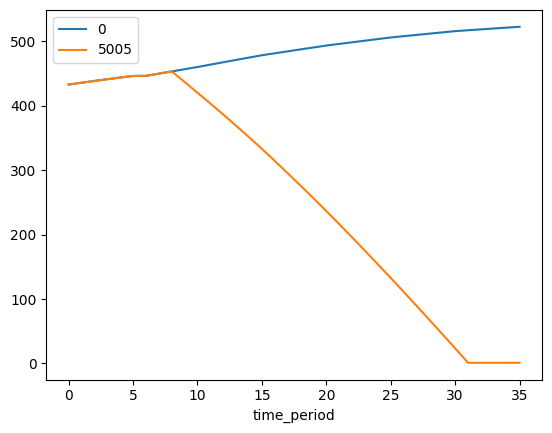

In [7]:
import support_functions as sf
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_entc")]
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_trns")]
df_wide = df_out[df_out["region"] == "brazil"][["primary_id", "time_period"] + fields]
df_wide = sf.pivot_df_clean(df_wide, ["primary_id"], fields);
df_wide.plot(x = "time_period")


In [24]:
import model_afolu as mafl
import model_ippu as mi
import model_energy as me
import model_circular_economy as mce
import setup_analysis as sa
import importlib
import numpy as np
import os, os.path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")
df_input["efficfactor_ccsq_heat_energy_direct_air_capture_electricity"] = 0.99

In [106]:
import inspect
#inspect.getmembers(sisepuede.database)
ft = sisepuede.experimental_manager.dict_future_trajectories.get("brazil")
df_input = ft.generate_future_from_lhs_vector(
    None,
    df_row_lhc_sample_l = None,
    future_id = 0,
    baseline_future_q = 0
)

df_input = df_input[df_input["strategy_id"] == 0].reset_index(drop = True).drop(["future_id", "strategy_id"], axis = 1)

In [142]:
df_input.to_csv("/Users/jsyme/Desktop/df_input_tmp.csv", index = None, encoding = "UTF-8")

In [21]:
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")

In [392]:
import ordered_direct_product_table as odpt
importlib.reload(odpt)  
            
    
    

vit = odpt.OrderedDirectProductTable(
    {"strategy_id": list(range(100)), "future_id": list(range(1000)), "design_id": [0, 1, 2, 3], "time_series_id": [0, 1, 2]},
    ["design_id", "time_series_id", "strategy_id", "future_id"],
    key_primary = "primary_id"
)


In [399]:
vit.get_dims_from_key(596, return_type = "dict")

{'design_id': 0, 'time_series_id': 0, 'strategy_id': 0, 'future_id': 596}

In [376]:
import time
t0 = time.time()

df1 = vit.get_indexing_dataframe(key_values = {"future_id": list(range(4000)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])

sf.get_time_elapsed(t0, n_digits = 5)

1.41068

In [401]:
vit.get_indexing_dataframe(key_values = {"future_id": list(range(5)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])




['primary_id']


,primary_id
0,0
1,1
2,2
3,3
4,4
...,...
175,1199000
176,1199001
177,1199002
178,1199003


In [332]:
#vit.get_indexing_dataframe(key_values = rands)
vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})

99871672

In [346]:
#vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})





get_dims_from_key(99871672, return_type = "dict")

{'design_id': 3, 'time_series_id': 0, 'strategy_id': 98, 'future_id': 71672}

In [338]:
99871672%30000000

9871672

In [330]:
#rands = np.random.choice(range(10**8), 3000, replace = False);
60/15
0%1

0

In [ ]:
#
# idea: 
#    0. generate output table of proper shape
#    1. generate dimensional vector
#    2. take subset of that vector
#    3. add to output table
#

In [262]:
vit.cardinality_ordered_reversed
vit.cumulative_dimensional_products_reversed
vit.get_key_value(**{"design_id": 3, "strategy_id": 1, "future_id": 0})



0
1
0
3


6400000

In [73]:
import model_attributes as ma
import model_afolu as mafl
import model_ippu as mi
import model_circular_economy as mc
import model_energy as me
import model_electricity as ml
import model_socioeconomic as se
import setup_analysis as sa
import support_functions as sf
import importlib
import time
import warnings
import sql_utilities as sq
from typing import *
import sqlalchemy
import sql_utilities as sqlutil

import importlib

importlib.reload(ma)
importlib.reload(sa)
importlib.reload(mafl)
importlib.reload(me)
importlib.reload(ml)

#importlib.reload(mafl)

warnings.filterwarnings("ignore")

#df_cs_integrated = pd.read_csv(os.path.join(sa.dir_tmp, "temporary_full_inputs.csv"))
#df_cs_integrated = df_cs_integrated[
#    df_cs_integrated["strategy_id"].isin([0])
#].reset_index(drop = True)
df_fake_data = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_complete.csv"))
df_cs_integrated0 = sisepuede.experimental_manager.dict_future_trajectories.get("mexico").generate_future_from_lhs_vector(None, None, 0, True)
df_cs_integrated0 = df_cs_integrated0[
    (df_cs_integrated0["strategy_id"] == 0)
].sort_values(by = ["time_period"]).reset_index(drop = True)

vars_try = [x for x in df_cs_integrated0.columns if x.startswith("fuelefficiency_") and ("road_light" in x)]
for x in vars_try:
    df_cs_integrated0[x] = min(np.array(df_cs_integrated0[x]))

df_cs_integrated = df_cs_integrated0.copy()
    
model_afolu = mafl.AFOLU(sa.model_attributes);
model_circecon = mc.CircularEconomy(sa.model_attributes);
model_ippu = mi.IPPU(sa.model_attributes);
model_energy = me.NonElectricEnergy(sa.model_attributes);

# 
df_project_afolu = model_afolu.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_afolu], sa.model_attributes, "concatenate")

# pass integrated df
df_project_ce = model_circecon.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ce], sa.model_attributes, "concatenate")

# pass integrated df
df_project_ip = model_ippu.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ip], sa.model_attributes, "concatenate")

# pass integrated df
df_project_en = model_energy.project(df_cs_integrated, subsectors_project = ["ccsq", "inen", "scoe", "trns", "fgtv"]);
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_en], sa.model_attributes, "concatenate")

model_elec = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = logger)
fp_sqlite_intermediate = sisepuede.file_struct.fp_sqlite_tmp_nemomod_intermediate
os.remove(fp_sqlite_intermediate) if os.path.exists(fp_sqlite_intermediate) else None
engine = sqlalchemy.create_engine(f"sqlite:///{fp_sqlite_intermediate}")


2023-03-07 09:46:02,951 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/SpecifiedDemandProfile.csv
2023-03-07 09:46:02,956 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/ref/nemo_mod/CapacityFactor.csv
2023-03-07 09:46:03,036 - INFO - Calling Julia API...
2023-03-07 09:46:03,101 - DEBUG - 	Successfully activated Julia with compiled_modules = False
2023-03-07 09:46:03,102 - DEBUG - 	Successfully imported julia.Base
2023-03-07 09:46:03,102 - DEBUG - 	Successfully imported julia.Main
2023-03-07 09:46:03,103 - DEBUG - 	Successfully imported julia.Pkg
2023-03-07 09:46:03,573 - DEBUG - 	Available Packages:
		'CSV'
		 'HiGHS'
		 'SQLite'
		 'Clp'
		 'JuMP'
		 'NemoMod'
		 'GAMS'
		 'Cbc'
		 'DataFrames'
		 'Gurobi'
		 'MathOptInterface'
  Activating2023-03-07 09:46:04,447 - INFO - Successfully activated Julia environment at '/Users/jsyme/Doc

In [74]:
fp_sqlite_intermediate = sisepuede.file_struct.fp_sqlite_tmp_nemomod_intermediate
os.remove(fp_sqlite_intermediate) if os.path.exists(fp_sqlite_intermediate) else None
engine = sqlalchemy.create_engine(f"sqlite:///{fp_sqlite_intermediate}")
df_test = model_elec.project(
    df_cs_integrated, 
    engine = engine,
    regions = ["mexico"]
);

2023-03-07 09:46:10,974 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-07-Mar 09:46:10.980 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-07-Mar 09:46:11.014 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-07-Mar 09:46:16.788 Started modeling scenario.

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107



2023-07-Mar 09:47:55.642 Finished modeling scenario.


2023-03-07 09:47:56,225 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>


<AxesSubplot:>

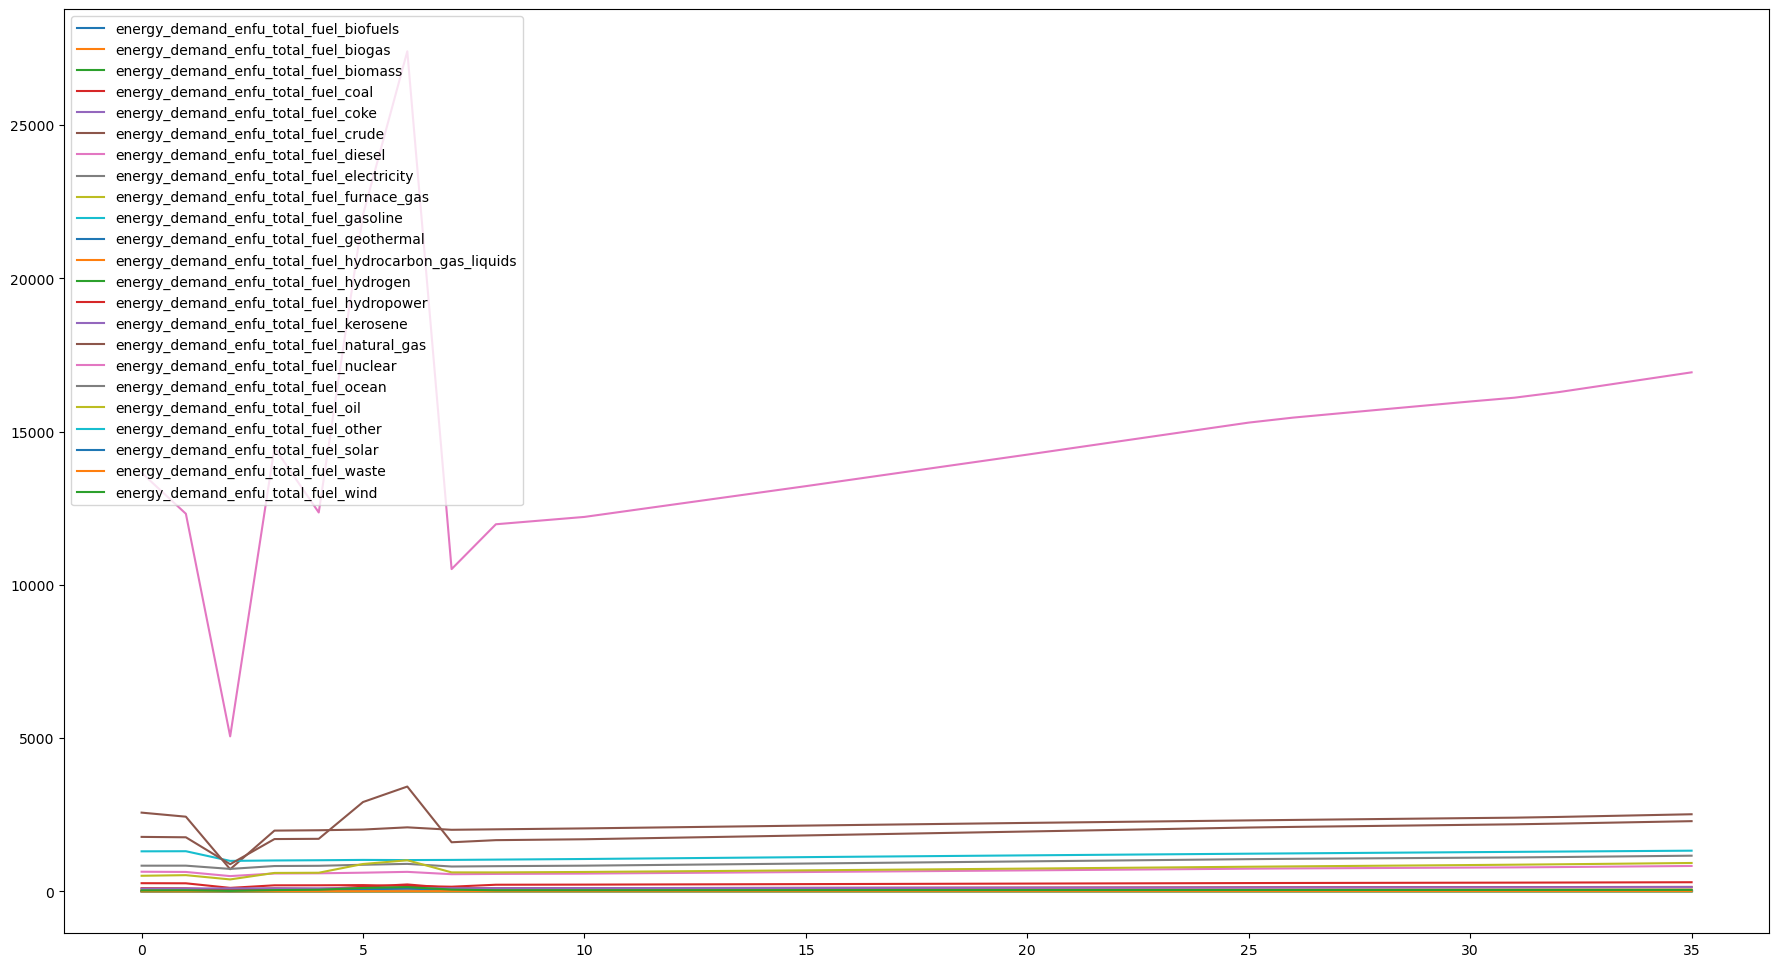

In [84]:
fig, ax = plt.subplots(figsize = (22, 12))
ax.legend(loc = "upper right")
df_test[[x for x in df_test.columns if "energy_demand_enfu_total" in x]].plot(ax = ax)

In [99]:
engine = sqlalchemy.create_engine(
    f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}"
)

df = sq.sql_table_to_df(
    engine,
    "vproductionbytechnologyannual"
    #"InputActivityRatio"
)

df[
    df["f"].isin(["fuel_electricity"]) &
    df["y"].isin(["1005", "1006", "1007"])
].sort_values(by = ["t", "y"])



df = sq.sql_table_to_df(
    engine,
    "vusebytechnologyannual"
    #"InputActivityRatio"
)
df[
    df["f"].isin(["fuel_electricity"]) &
    df["y"].isin(["1005", "1006", "1007"])
].sort_values(by = ["t", "y"])


,r,t,f,y,val,solvedtm
175,mexico,fp_hydrogen_electrolysis,fuel_electricity,1005,0.050414,2023-03-07 09:47:54.982
1154,mexico,fp_hydrogen_electrolysis,fuel_electricity,1006,0.050377,2023-03-07 09:47:54.982
533,mexico,fp_natural_gas,fuel_electricity,1005,15.392909,2023-03-07 09:47:54.982
730,mexico,fp_natural_gas,fuel_electricity,1006,20.929688,2023-03-07 09:47:54.982
645,mexico,fp_natural_gas,fuel_electricity,1007,0.999209,2023-03-07 09:47:54.982
155,mexico,me_coal,fuel_electricity,1005,0.863962,2023-03-07 09:47:54.982
1132,mexico,me_coal,fuel_electricity,1006,0.631623,2023-03-07 09:47:54.982
1080,mexico,me_coal,fuel_electricity,1007,0.786560,2023-03-07 09:47:54.982
835,mexico,me_crude,fuel_electricity,1005,197.885124,2023-03-07 09:47:54.982
1100,mexico,me_crude,fuel_electricity,1006,200.887247,2023-03-07 09:47:54.982


In [100]:
model_energy.get_enfu_fuel_costs_per_energy(df_cs_integrated)

array([[1.79996655e+01, 2.07547170e+04, 1.61369231e+01, 4.16777147e+00,
        0.00000000e+00, 7.14259893e+00, 1.17139336e+01, 4.07623626e+01,
        4.85459621e+01, 3.92161322e+06, 4.23392857e+01, 0.00000000e+00,
        1.76962318e+02, 5.55703125e+02, 0.00000000e+00, 8.56527834e+00,
        1.16626155e+01, 0.00000000e+00, 2.08369878e-02, 0.00000000e+00,
        1.67341909e+01, 0.00000000e+00, 0.00000000e+00, 8.84905660e+03,
        0.00000000e+00],
       [1.79996655e+01, 2.07547170e+04, 1.61369231e+01, 4.16777147e+00,
        0.00000000e+00, 7.14259893e+00, 1.17139336e+01, 4.07623626e+01,
        4.85459621e+01, 3.92161322e+06, 4.23392857e+01, 0.00000000e+00,
        1.76962318e+02, 5.55703125e+02, 0.00000000e+00, 8.56527834e+00,
        1.16626155e+01, 0.00000000e+00, 2.08369878e-02, 0.00000000e+00,
        1.67341909e+01, 0.00000000e+00, 0.00000000e+00, 8.84905660e+03,
        0.00000000e+00],
       [1.79996655e+01, 2.07547170e+04, 1.61369231e+01, 4.16777147e+00,
        0.0000

<AxesSubplot:>

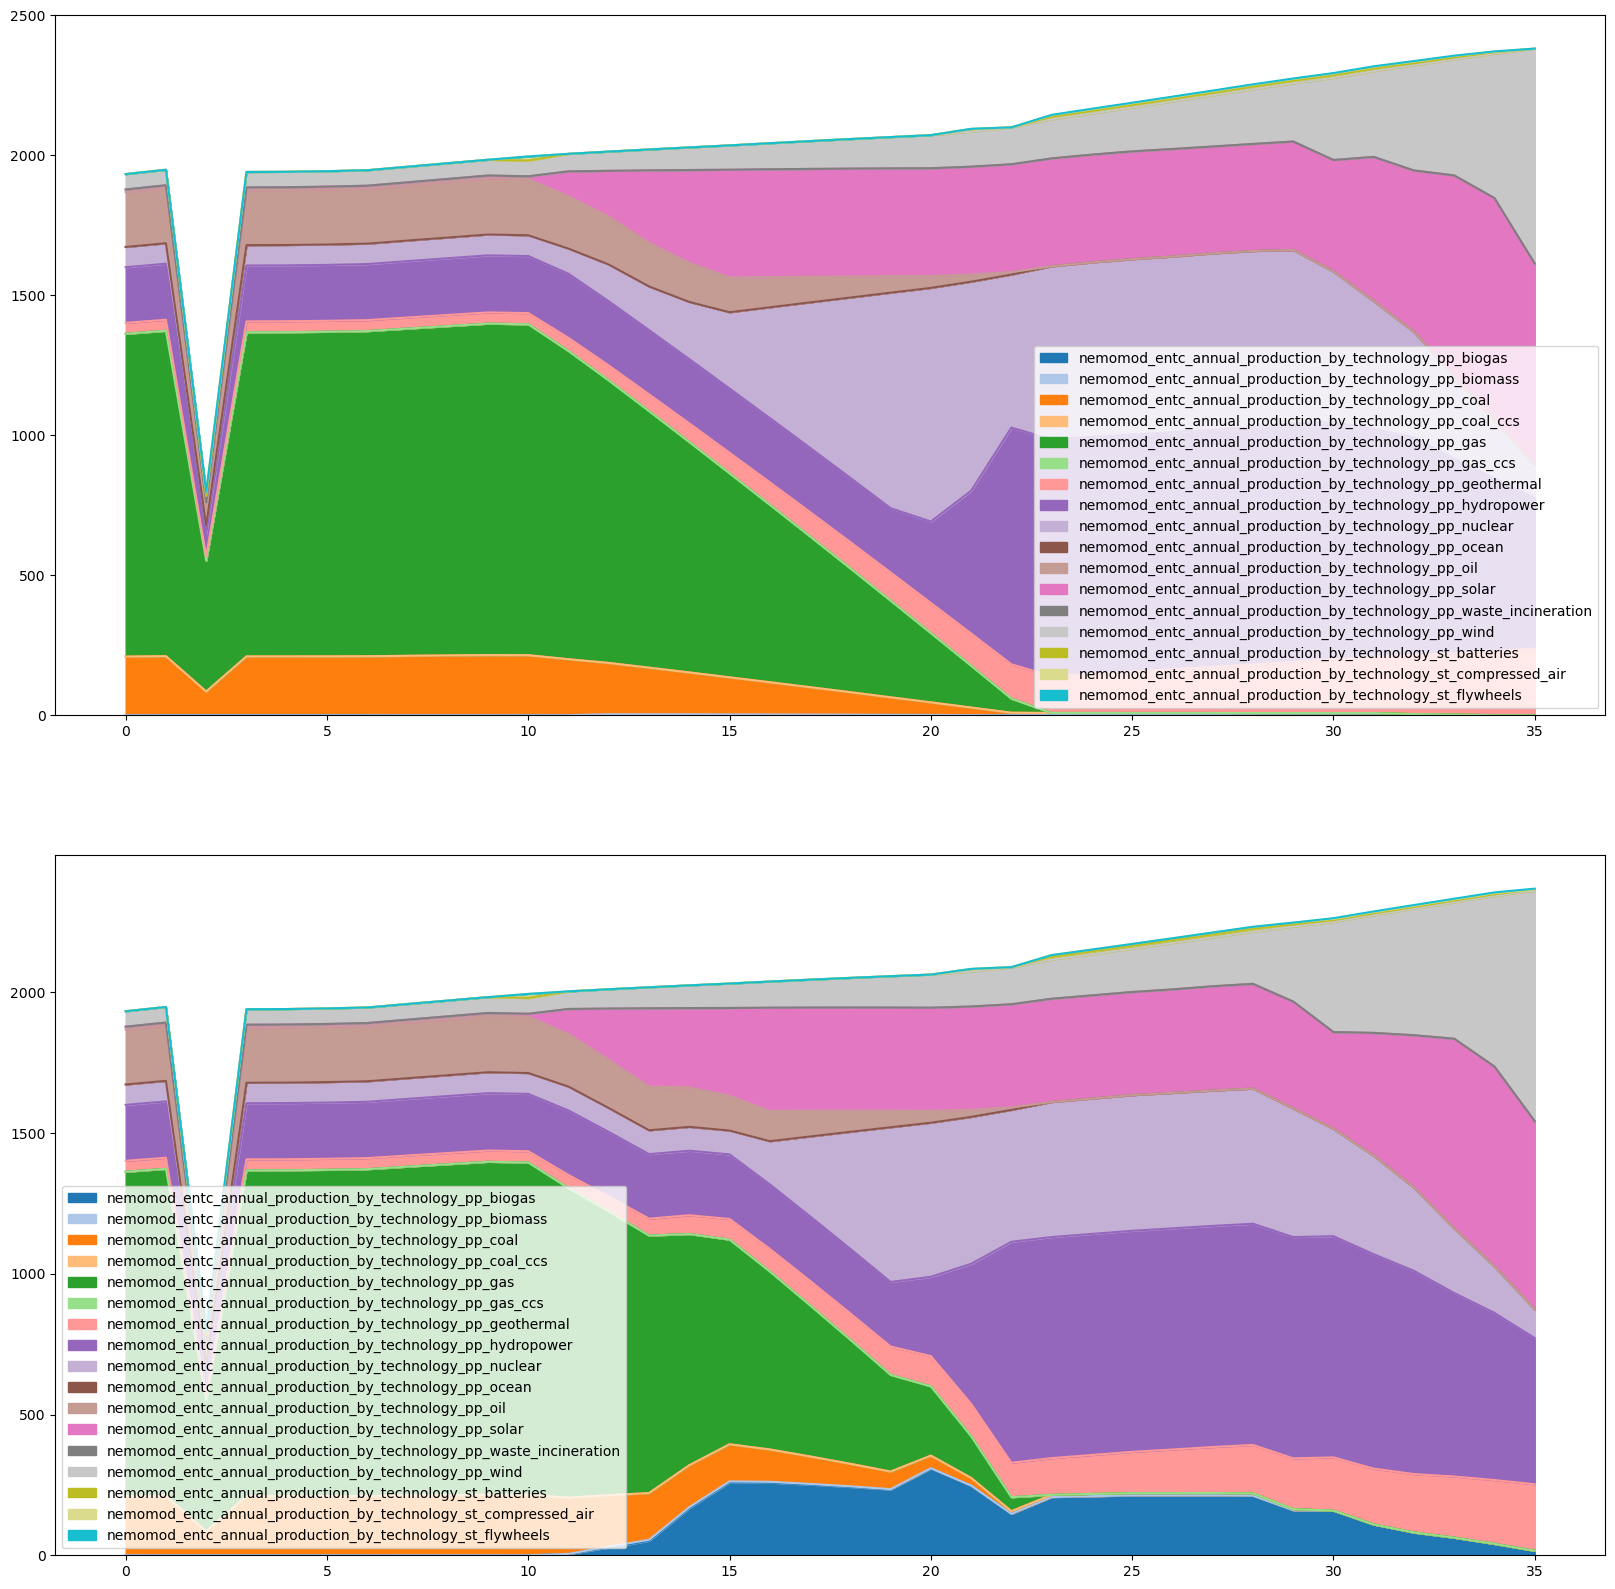

In [24]:
# 3008, 3009, 3031
strat_id, strat_id_intervention = 0, 3031

# intervention
dict_filt_invervention = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id_intervention]
    dict_filt_invervention.update({k: val[0]})
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt_invervention)



fig, ax = plt.subplots(2, 1, figsize = (20, 20))
palette_func = plt.cm.tab20#plt.cm.hsv

flds = [
    x for x in df_filt.columns 
    if x.startswith("emission_co2e_subsector_total") 
    and (
        ("ccsq" in x) 
        or ("entc" in x)
        or ("enfu" in x)
        or ("fgtv" in x)
        or ("inen" in x)
        or ("scoe" in x)
        or ("trns" in x)
    )
]

flds = [x for x in df_filt.columns if x.startswith("energy_demand_enfu_total")]

modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_emissions_co2_mne
modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
#modvar_plot = model_elec.modvar_entc_nemomod_production_by_technology
#modvar_plot = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
df = sisepuede.model_attributes.get_standard_variables(
    df_test,
    modvar_plot
)
#df = df_filt[flds]
for k in df.columns:
    df[k] = sf.vec_bounds(np.array(df[k]), (0, np.inf))

m, n = df.shape
colors = [palette_func(x/n) for x in range(n)]

df.plot.area(ax = ax[0], color = colors)


df = sisepuede.model_attributes.get_standard_variables(
    df_filt_intervention,
    modvar_plot
)
#df = df_filt_intervention[flds]
for k in df.columns:
    df[k] = sf.vec_bounds(np.array(df[k]), (0, np.inf))

m, n = df.shape
colors = [palette_func(x/n) for x in range(n)]

df.plot.area(ax = ax[1], color = colors)




In [233]:
table_name = "vregenerationannualnn"
table_name = "vproductionbytechnologyannual"
#table_name = "REMinProductionTarget"
df = sqlutil.sql_table_to_df(engine, table_name)

df[
    df["y"].isin(["1001"])
]


,r,t,f,y,val,solvedtm
200,chile,supply_fuel_kerosene,fuel_kerosene,1001,1.762004e+01,2023-03-05 00:57:59.801
251,chile,fp_petroleum_refinement,fuel_diesel,1001,1.261535e+02,2023-03-05 00:57:59.801
252,chile,pp_biomass,fuel_electricity,1001,1.509152e+01,2023-03-05 00:57:59.801
285,chile,supply_fuel_coal_deposits,fuel_coal_deposits,1001,1.434124e+02,2023-03-05 00:57:59.801
333,chile,pp_hydropower,fuel_electricity,1001,1.067522e+02,2023-03-05 00:57:59.801
346,chile,fp_natural_gas,fuel_natural_gas,1001,4.188608e+02,2023-03-05 00:57:59.801
356,chile,supply_fuel_hydrogen,fuel_hydrogen,1001,1.980038e-03,2023-03-05 00:57:59.801
393,chile,supply_fuel_coal,fuel_coal,1001,4.174539e+02,2023-03-05 00:57:59.801
422,chile,fp_petroleum_refinement,fuel_hydrocarbon_gas_liquids,1001,1.699609e+01,2023-03-05 00:57:59.801
426,chile,supply_fuel_gasoline,fuel_gasoline,1001,1.075147e+02,2023-03-05 00:57:59.801


In [247]:
df_out = model_elec.retrieve_output_tables_from_sql(
    engine,
    df_cs_integrated
)

In [257]:
df_out_all[
    df_out_all["region"].isin(["chile"]) &
    df_out_all["primary_id"].isin([35035])
][[x for x in df_out_all.columns if "nemomod_entc_annual_production_by_technology" in x]].iloc[0]

nemomod_entc_annual_production_by_technology_pp_biogas               NaN
nemomod_entc_annual_production_by_technology_pp_biomass              NaN
nemomod_entc_annual_production_by_technology_pp_coal                 NaN
nemomod_entc_annual_production_by_technology_pp_coal_ccs             NaN
nemomod_entc_annual_production_by_technology_pp_gas                  NaN
nemomod_entc_annual_production_by_technology_pp_gas_ccs              NaN
nemomod_entc_annual_production_by_technology_pp_geothermal           NaN
nemomod_entc_annual_production_by_technology_pp_hydropower           NaN
nemomod_entc_annual_production_by_technology_pp_nuclear              NaN
nemomod_entc_annual_production_by_technology_pp_ocean                NaN
nemomod_entc_annual_production_by_technology_pp_oil                  NaN
nemomod_entc_annual_production_by_technology_pp_solar                NaN
nemomod_entc_annual_production_by_technology_pp_waste_incineration   NaN
nemomod_entc_annual_production_by_technology_pp_win

In [253]:
df_test[[x for x in df_test.columns if "nemomod_entc_annual_production_by_technology" in x]]
#df_filt_intervention[[x for x in df_filt_intervention.columns if "nemomod_entc_annual_production_by_technology" in x]]

,nemomod_entc_annual_production_by_technology_pp_biogas,nemomod_entc_annual_production_by_technology_pp_biomass,nemomod_entc_annual_production_by_technology_pp_coal,nemomod_entc_annual_production_by_technology_pp_coal_ccs,nemomod_entc_annual_production_by_technology_pp_gas,nemomod_entc_annual_production_by_technology_pp_gas_ccs,nemomod_entc_annual_production_by_technology_pp_geothermal,nemomod_entc_annual_production_by_technology_pp_hydropower,nemomod_entc_annual_production_by_technology_pp_nuclear,nemomod_entc_annual_production_by_technology_pp_ocean,nemomod_entc_annual_production_by_technology_pp_oil,nemomod_entc_annual_production_by_technology_pp_solar,nemomod_entc_annual_production_by_technology_pp_waste_incineration,nemomod_entc_annual_production_by_technology_pp_wind,nemomod_entc_annual_production_by_technology_st_batteries,nemomod_entc_annual_production_by_technology_st_compressed_air,nemomod_entc_annual_production_by_technology_st_flywheels
0,0.000000,13.615295,117.636247,0.0,47.710704,0.0,0.0,104.513285,0.000000,0.0,13.258338,15.501959,0.0,9.431780,0.000000,0.000000,0.000000
1,0.000000,15.091520,120.156334,0.0,48.732796,0.0,0.0,106.752243,0.000000,0.0,13.542367,14.649504,0.0,9.633834,0.000000,0.286680,0.000000
2,0.000000,10.374793,105.523229,0.0,42.797927,0.0,0.0,93.751541,0.000000,0.0,11.893125,15.744253,0.0,8.460588,0.000000,0.000679,0.000000
3,0.000000,5.703556,118.812558,0.0,48.187790,0.0,0.0,105.558373,0.000000,0.0,13.390916,23.704857,0.0,9.526094,0.000000,0.000000,0.000000
4,0.000000,7.018580,119.919713,0.0,48.636828,0.0,0.0,106.542018,0.000000,0.0,13.515699,22.026400,0.0,10.252338,0.000000,0.000000,0.000000
5,0.000000,7.742643,120.879906,0.0,49.026261,0.0,0.0,107.395097,0.000000,0.0,13.623918,22.177479,0.0,9.691848,0.000000,0.000000,0.000000
6,0.000000,8.027427,121.254102,0.0,49.178027,0.0,0.0,107.727549,0.000000,0.0,13.666093,21.985316,0.0,9.721850,0.000000,0.000000,0.000000
7,0.000000,9.042710,122.599646,0.0,49.723750,0.0,0.0,108.922990,0.000000,0.0,13.817744,21.303081,0.0,9.829733,0.000000,0.000000,0.000000
8,0.000000,10.632574,123.940390,0.0,50.267527,0.0,0.0,110.114168,0.000000,0.0,13.968854,20.045077,0.0,9.937230,0.000000,0.000000,0.000000
9,0.000000,11.814330,125.317496,0.0,50.826051,0.0,0.0,111.337650,0.000000,0.0,14.124063,19.204182,0.0,10.047643,0.124130,0.000000,0.000000


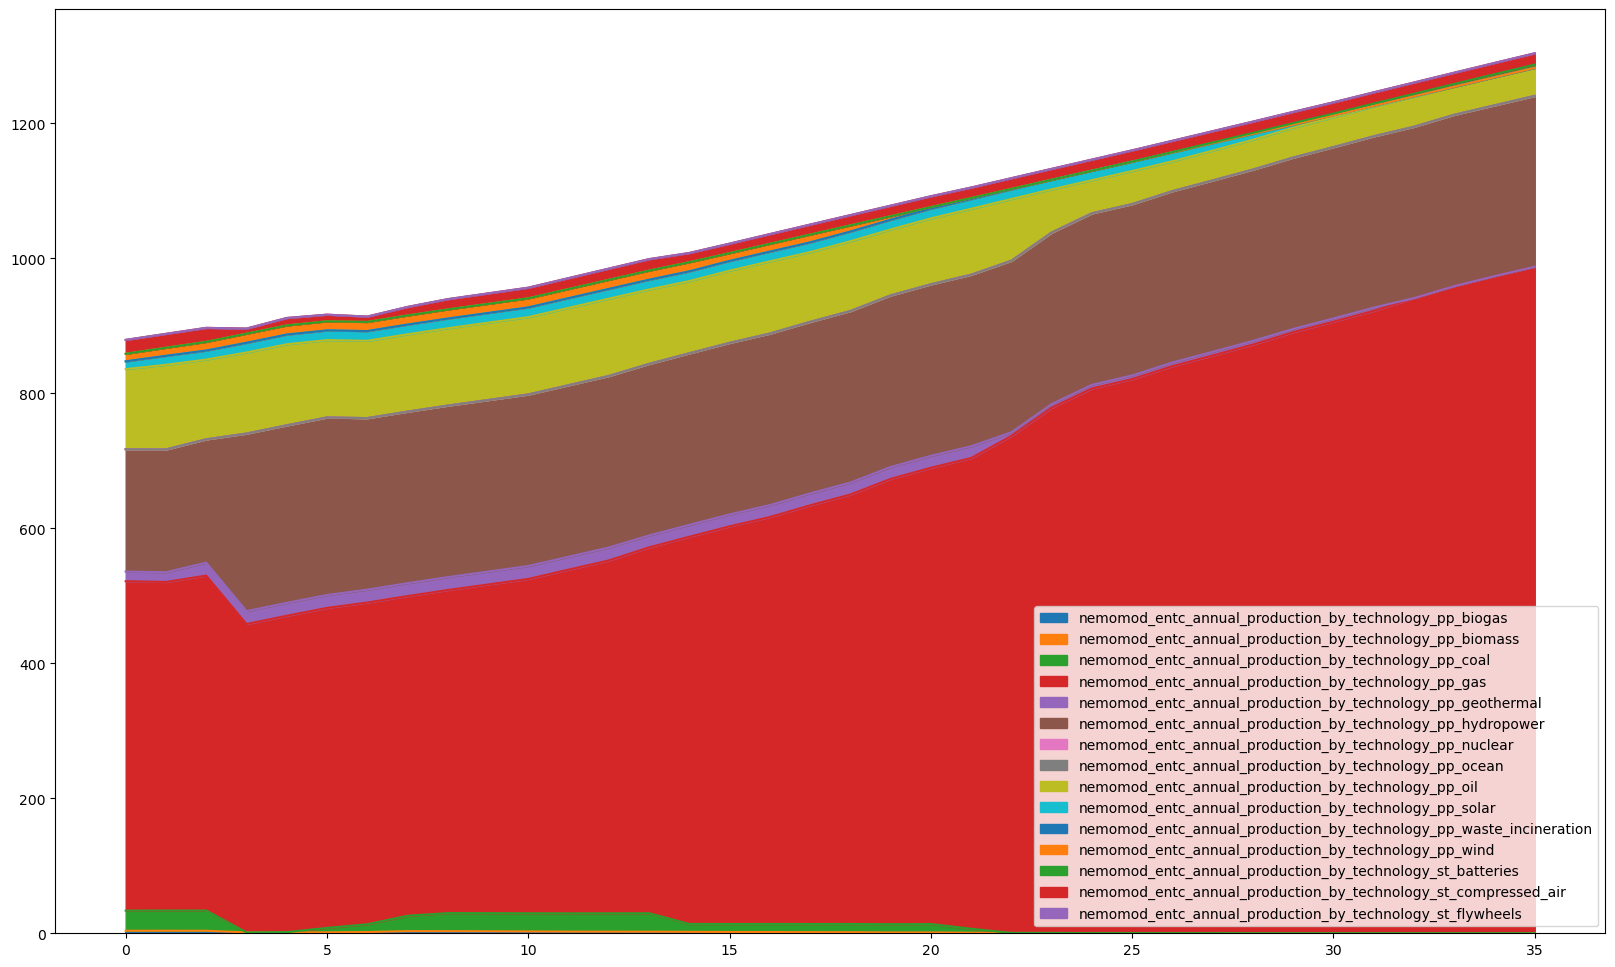

In [90]:

dict_filt2 = {}


fig, ax = plt.subplots(figsize = (20, 12))

if True:
    sisepuede.model_attributes.get_standard_variables(
        df_test,
        sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    ).plot.area(ax = ax)
else:
    sisepuede.model_attributes.get_standard_variables(
        df_cs_integrated,
        sisepuede.models.model_electricity.modvar_entc_nemomod_residual_capacity
    ).plot.area(ax = ax)

In [77]:
import inspect
import time
inspect.getmembers(sisepuede.database.db)

dir_exp = os.path.join(sisepuede.file_struct.dir_out, f"csvs_{sisepuede.analysis_id.id_fs_safe}")
if not os.path.exists(dir_exp):
    os.makedirs(dir_exp, exist_ok = True)
    
t0 = time.time()
for k in sisepuede.database.db.dict_iterative_database_tables:
    
    print(f"Starting table {k}...")
    
    fp_write = os.path.join(dir_exp, f"{k}.csv")
    
    if not os.path.exists(fp_write):
        idt = sisepuede.database.db.dict_iterative_database_tables.get(k)
        tab = idt.read_table()

        tab.to_csv(
            fp_write,
            index = None,
            encoding = "UTF-8"
        ) if (tab is not None) else None
    
    t_elapse = np.round(time.time() - t0, decimals = 4)
    print(f"Table {k} complete at {t_elapse} seconds.\n\n")
    


Starting table ANALYSIS_METADATA...
Table ANALYSIS_METADATA complete at 0.0016 seconds.


Starting table ATTRIBUTE_DESIGN...
Table ATTRIBUTE_DESIGN complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES...
Table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS...
Table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS complete at 0.0018 seconds.


Starting table ATTRIBUTE_PRIMARY...
Table ATTRIBUTE_PRIMARY complete at 0.0019 seconds.


Starting table ATTRIBUTE_STRATEGY...
Table ATTRIBUTE_STRATEGY complete at 0.0019 seconds.


Starting table MODEL_BASE_INPUT_DATABASE...
Table MODEL_BASE_INPUT_DATABASE complete at 0.002 seconds.


Starting table MODEL_INPUT...
Table MODEL_INPUT complete at 0.0022 seconds.


Starting table MODEL_OUTPUT...
Table MODEL_OUTPUT complete at 23.5008 seconds.




In [64]:
df = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT").read_table();


##  RUBBER AND LEATHER ISSUES

In [ ]:
dict_inputs = sisepuede.generate_scenario_database_from_primary_key(0);


In [30]:
region_check = "brazil"
df_input_check = dict_inputs.get(region_check)
df_output_check = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin([region_check])
].reset_index(drop = True)

In [31]:
df_input_check[[x for x in df_input_check.columns if "rubber" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,demscalar_ippu_rubber_and_leather,ef_waso_incineration_tonne_n2o_per_tonne_rubber_leather,elasticity_ippu_rubber_and_leather_production_to_gdp,elasticity_waso_msw_to_gdppc_rubber_leather,factor_waso_waste_per_capita_scalar_rubber_leather,frac_inen_energy_recycled_rubber_and_leather_coal,frac_inen_energy_recycled_rubber_and_leather_coke,frac_inen_energy_recycled_rubber_and_leather_diesel,...,frac_waso_recycled_rubber_leather,physparam_waso_k_rubber_leather,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_rubber_and_leather_tonne,qty_ippu_recycled_rubber_and_leather_tonne_cod_per_m3_ww,qty_ippu_rubber_and_leather_tonne_cod_per_m3_ww,scalar_inen_energy_demand_recycled_rubber_and_leather,scalar_inen_energy_demand_rubber_and_leather,vol_ippu_recycled_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_rubber_and_leather_m3_ww_per_tonne_production
0,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.050828,0.005648,0.000187,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
1,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
2,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
3,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
4,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182


In [32]:
df_input_check[[x for x in df_input_check.columns if "cement" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,dem_ippu_average_materials_tonne_per_household_cement,demscalar_ippu_cement,ef_ippu_tonne_co2_per_tonne_production_cement_clinker,elasticity_ippu_cement_production_to_gdp,frac_inen_energy_cement_coal,frac_inen_energy_cement_coke,frac_inen_energy_cement_diesel,frac_inen_energy_cement_electricity,frac_inen_energy_cement_gas_furnace,...,frac_inen_energy_cement_natural_gas,frac_inen_energy_cement_oil,frac_inen_energy_cement_solar,frac_inen_energy_cement_solid_biomass,frac_ippu_cement_clinker,net_imports_cement_clinker_tonne,prodinit_ippu_cement_tonne,qty_ippu_cement_tonne_cod_per_m3_ww,scalar_inen_energy_demand_cement,vol_ippu_cement_m3_ww_per_tonne_production
0,0.02,3.0,0.995377,0.264371,0.25,0.318215,0.035357,0.059189,0.158820,0.0,...,0.064766,0.276215,0.0,0.028249,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
1,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
2,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
3,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
4,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123


In [28]:
df_input_check[[x for x in df_input_check.columns if ("rubber" in x) and x.startswith("frac_waso")]].head()

,frac_waso_initial_composition_ind_rubber_leather,frac_waso_initial_composition_mun_rubber_leather,frac_waso_recycled_rubber_leather
0,0.0,0.0,0.066
1,0.0,0.0,0.066
2,0.0,0.0,0.066
3,0.0,0.0,0.066
4,0.0,0.0,0.066


In [27]:
import inspect
import sqlalchemy
import sql_utilities as sq
engine = sqlalchemy.create_engine(
    f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}"
)

sq.sql_table_to_df(
    engine,
    "InputActivityRatio"
    #"InputActivityRatio"
)

In [36]:
engine.table_names()

['AccumulatedAnnualDemand',
 'AnnualEmissionLimit',
 'AnnualExogenousEmission',
 'AvailabilityFactor',
 'CapacityFactor',
 'CapacityOfOneTechnologyUnit',
 'CapacityToActivityUnit',
 'CapitalCost',
 'CapitalCostStorage',
 'DefaultParams',
 'DepreciationMethod',
 'DiscountRate',
 'EMISSION',
 'EmissionActivityRatio',
 'EmissionsPenalty',
 'FUEL',
 'FixedCost',
 'InputActivityRatio',
 'InterestRateStorage',
 'InterestRateTechnology',
 'LTsGroup',
 'MODE_OF_OPERATION',
 'MinShareProduction',
 'MinStorageCharge',
 'MinimumUtilization',
 'ModelPeriodEmissionLimit',
 'ModelPeriodExogenousEmission',
 'NODE',
 'NodalDistributionDemand',
 'NodalDistributionStorageCapacity',
 'NodalDistributionTechnologyCapacity',
 'OperationalLife',
 'OperationalLifeStorage',
 'OutputActivityRatio',
 'REGION',
 'REMinProductionTarget',
 'RETagTechnology',
 'RampRate',
 'RampingReset',
 'ReserveMargin',
 'ReserveMarginTagFuel',
 'ReserveMarginTagTechnology',
 'ResidualCapacity',
 'ResidualStorageCapacity',
 'STOR

In [9]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)
df_try.to_csv(
    os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
    encoding = "UTF-8",
    index = None
)

In [31]:
import inspect
sisepuede.odpt_primary.get_key_value(
    strategy_id = 3011,
    future_id = 0, 
    design_id = 0
)




15015

In [17]:
df_out[
    (df_out["region"] == "brazil") & 
    (df_out["time_period"].isin([4, 5])) & 
    (df_out["primary_id"].isin([0, 15015])) 
][
    [x for x in df_out.columns if ("emission_co2e" in x) and ("trns" in x)]
]


,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
940,0.000009,0.0,0.003729,0.003175,0.000101,0.000057,0.122332,0.006572,1.316938,0.000133,...,0.0,0.010166,0.026133,0.006799,0.003865,0.923724,0.047992,3.556169,0.000371,237.558203
941,0.000009,0.0,0.003749,0.003193,0.000100,0.000058,0.120889,0.006596,1.322850,0.000132,...,0.0,0.010222,0.026278,0.006770,0.003879,0.910773,0.048171,3.572172,0.000370,237.439346
1336,0.000009,0.0,0.003729,0.003175,0.000101,0.000057,0.123489,0.006572,1.320636,0.000133,...,0.0,0.010166,0.026133,0.006799,0.003865,0.935050,0.047992,3.565980,0.000371,238.819438
1337,0.000009,0.0,0.003749,0.003193,0.000100,0.000058,0.122964,0.006596,1.327975,0.000132,...,0.0,0.010222,0.026278,0.006770,0.003879,0.931073,0.048171,3.585797,0.000370,239.514858


In [25]:
df_check = df_out[
    df_out["region"].isin(["brazil"]) &
    df_out["primary_id"].isin([0])
].reset_index(drop = True)
df_check[[
    x for x in df_check.columns if ("regional" in x) and ("trde" in x)
]]


,dem_trde_regional_passenger_km
0,1.120458e+06
1,1.125540e+06
2,1.130507e+06
3,1.135304e+06
4,1.139856e+06
5,1.144110e+06
6,1.147918e+06
7,1.158527e+06
8,1.169114e+06
9,1.179678e+06


In [36]:
df_check[
    df_check["time_period"].isin([0, 2])
][[
    x for x in df_check.columns if ("emission" in x) and ("trns" in x)
]]

,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
0,4.865727e-09,0.0,1.978793e-08,0.000002,0.012289,0.000004,0.455738,0.000004,0.000005,0.000139,...,0.0,5.395002e-08,0.000012,0.828718,0.000241,1.586244,0.000032,0.000013,0.000389,95.992430
2,4.909364e-09,0.0,2.004421e-08,0.000002,0.012187,0.000004,0.087895,0.000004,0.000005,0.000138,...,0.0,5.464875e-08,0.000012,0.821786,0.000248,0.578974,0.000033,0.000013,0.000386,47.141113


In [54]:
flds = list(df_try2.columns)#[x for x in df_try2.columns if ("road_heavy_freight" in x)]
fld_check = []

for fld in flds:
    vec = np.array(df_try2[fld])
    v0, v2 = vec[0], vec[2]
    delta = np.abs(vec[2]/vec[0] - 1)
    
    if (delta > 0.05) and (("trns" in fld) or ("trde" in fld)):
        print(f"field '{fld}':\n\tv0:\t{v0}\n\tv2:\t{v2}\n")
        fld_check.append(fld)

field 'frac_trns_fuelmix_public_electricity':
	v0:	0.0014800197335964
	v2:	0.0009078529278256

field 'frac_trns_fuelmix_road_light_diesel':
	v0:	0.0273322508679524
	v2:	0.0291327470632048

field 'frac_trns_fuelmix_road_light_electricity':
	v0:	0.0002244135545786
	v2:	0.000431209084138

